<a href="https://colab.research.google.com/github/sandeepskumar0/VANNA_AI/blob/main/VANNAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Package

In [ ]:
!pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00


import neccesary packages

In [ ]:

import pandas as pd
from sqlalchemy import create_engine
from vanna.remote import VannaDefault
from IPython.display import Image


Initialize VannaDefault with pretrained model and API key

In [ ]:
#pre-trained model with my api key
vn = VannaDefault(model='chinook', api_key='enterapikey')


# Connect to the SQLite database hosted on Vanna & Display Schema Image

In [ ]:

vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

schema_url = "https://m-soro.github.io/Business-Analytics/SQL-for-Data-Analysis/L4-Project-Query-Music-Store/Misc/001.png"
Image(url=schema_url)



 Create a SQLAlchemy engine

In [ ]:

engine = create_engine('sqlite:///Chinook.sqlite')

 Fetch the list of tables in the db

In [ ]:

tables = pd.read_sql("""SELECT *
                         FROM sqlite_master
                         WHERE type='table'""", engine)
print(tables)

     type           name       tbl_name  rootpage  \
0   table          Album          Album        19   
1   table         Artist         Artist       281   
2   table       Customer       Customer       386   
3   table       Employee       Employee       392   
4   table          Genre          Genre       395   
5   table        Invoice        Invoice       396   
6   table    InvoiceLine    InvoiceLine       399   
7   table      MediaType      MediaType       402   
8   table       Playlist       Playlist       404   
9   table  PlaylistTrack  PlaylistTrack       405   
10  table          Track          Track       409   

                                                  sql  
0   CREATE TABLE [Album]\n(\n    [AlbumId] INTEGER...  
1   CREATE TABLE [Artist]\n(\n    [ArtistId] INTEG...  
2   CREATE TABLE [Customer]\n(\n    [CustomerId] I...  
3   CREATE TABLE [Employee]\n(\n    [EmployeeId] I...  
4   CREATE TABLE [Genre]\n(\n    [GenreId] INTEGER...  
5   CREATE TABLE [Invoice]\


fetch all the details of album table

In [ ]:


albums = pd.read_sql_query("SELECT * FROM Employee", engine)
print(albums)



   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           1     Adams    Andrew      General Manager        NaN   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           3   Peacock      Jane  Sales Support Agent        2.0   
3           4      Park  Margaret  Sales Support Agent        2.0   
4           5   Johnson     Steve  Sales Support Agent        2.0   
5           6  Mitchell   Michael           IT Manager        1.0   
6           7      King    Robert             IT Staff        6.0   
7           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate                      Address  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00          11120 Jasper Ave NW   
1  1958-12-08 00:00:00  2002-05-01 00:00:00                 825 8 Ave SW   
2  1973-08-29 00:00:00  2002-04-01 00:00:00                1111 6 Ave SW   
3  1947-09-19 00:00:00  2003-05-03 00:00:00             683 10 Street SW  

Ask Questions

[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NU

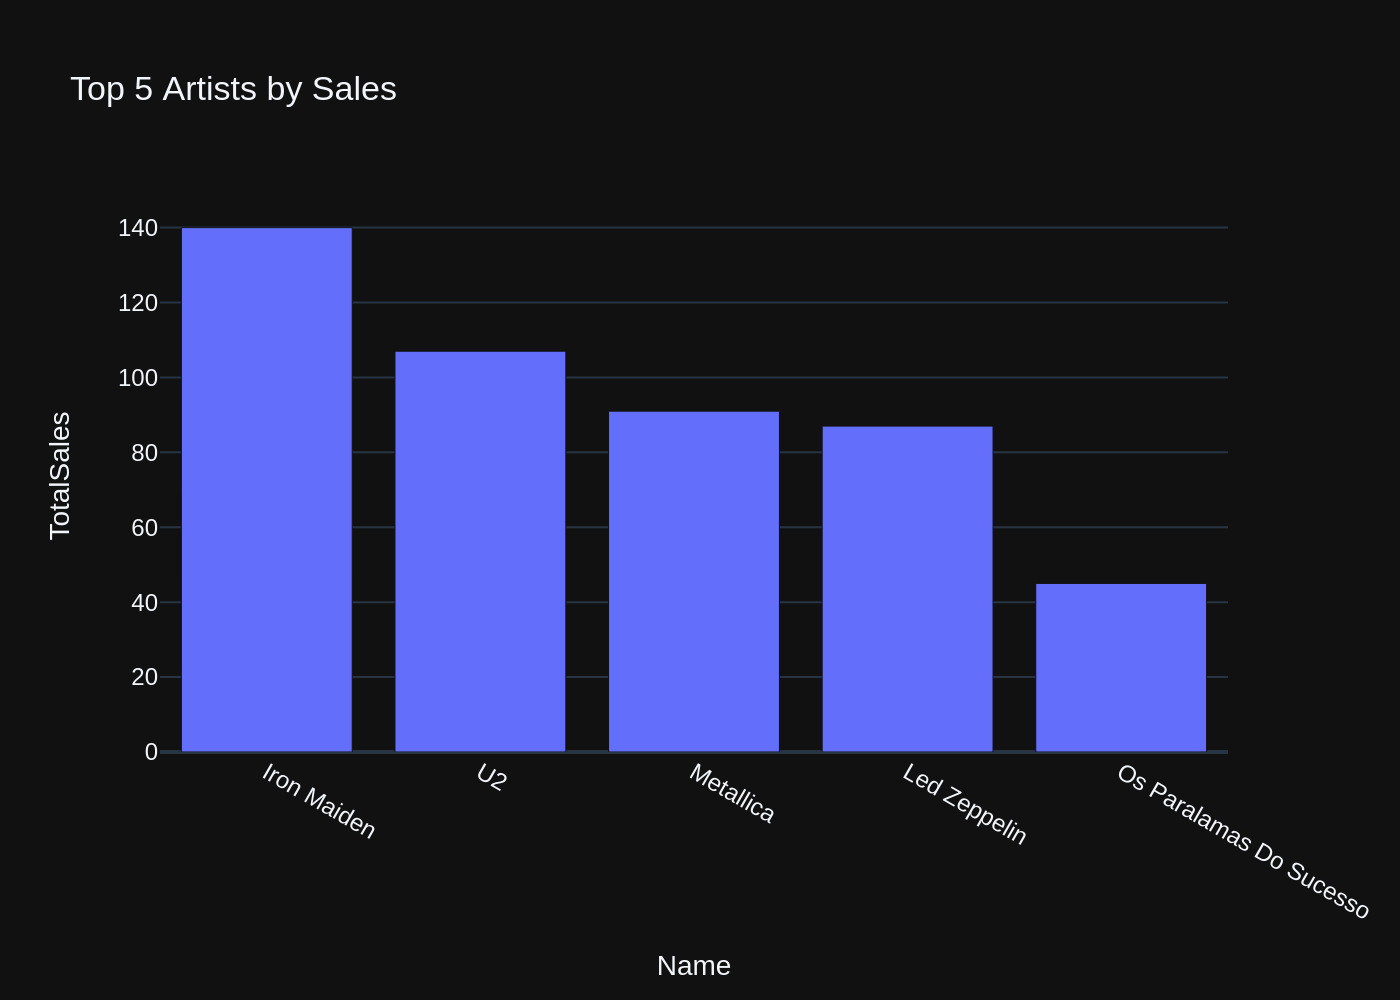

Vanna's response: ('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 5;',    ArtistId                     Name  TotalSales
0        90              Iron Maiden         140
1       150                       U2         107
2        50                Metallica          91
3        22             Led Zeppelin          87
4       113  Os Paralamas Do Sucesso          45, Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Name=%{x}<br>TotalSales=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'ty

In [ ]:

response = vn.ask("What are the top 5 artists by sales?")

if response is None:
    print("No response received from Vanna.")
else:
    print("Vanna's response:", response)

For Interface

In [ ]:

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Google Colab doesn't support running websocket servers. Disabling debug mode.


<IPython.core.display.Javascript object>

Your app is running at:
https://gxz7h5h3oid-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n  